In [47]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("housepricedata.csv")

print(df.describe)

dataset = df.values


X = dataset[:,0:10]
Y = dataset[:,10]



<bound method NDFrame.describe of       LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
...       ...          ...          ...          ...       ...       ...   
1455     7917            6            5          953         2         1   
1456    13175            6            6         1542         2         0   
1457     9042            7            9         1152         2         0   
1458     9717            5            6         1078         1         0   
1459     9937            5            6         1256         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageA

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)




In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers


2022-06-10 11:42:23.423089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 11:42:23.423146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [51]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [52]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.7041 - accuracy: 0.5039 - val_loss: 0.6993 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5039 - val_loss: 0.6951 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5010 - val_loss: 0.6921 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5294 - val_loss: 0.6896 - val_accuracy: 0.6895
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.7045 - val_loss: 0.6873 - val_accuracy: 0.7078
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.7290 - val_loss: 0.6851 - val_accuracy: 0.7123
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.7642 - val_loss: 0.6828 - val_accuracy: 0.7078
Epoch 8/100


In [54]:
model.evaluate(X_test, Y_test)

results = model.predict(X_test)

# finall_result = np.concatenate((X_test, results.T), axis=1)

inverse_results = min_max_scaler.inverse_transform(X_test)

model.summary()


7/7 [==============================] - 0s 2ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                352       
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.summary()
model.history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                352       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


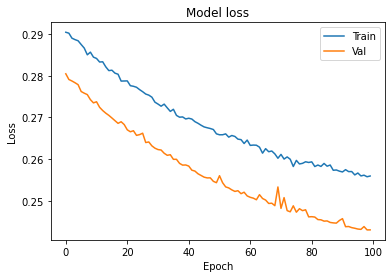

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()